In [1]:
#Although of course Julia has a built-in sqrt(a) function, here we will 
#implement Newton's method for the square root, which corresponds to 
#the iteration: x_(n+1) = 1/2 * (x_n + a/x_n) for sqrt(a).This is 
#equivalent to Newton's method to find a root of f(x)=x**2 -a, in which 
#we repeatedly approximate f by its tangent at x_n and find the root of 
#the tangent line. Let's try for sqrt(2) starting with a guess of 1.5:

x = 1.5 
a = 2
x = (x + a/x)/2
print(x)

1.4166666666666665

In [2]:
x = (x + a/x)/2
print(x)

1.4142156862745097

In [8]:
#After three iterations we have 12 correct digits!
#To see more, let's write a function iterate_sqrt to perform n 
#iterations and use it to explore a bit

function iterate_sqrt(a, n, x)
    for i in 1:n 
        x = (x + a/x)/2
    end
    return x
end

# We can easily see that this quickly converges just by running it a few times

iterate_sqrt(2, 10, 1) - sqrt(2)

-2.220446049250313e-16

In [14]:
#But it is more fun to see this interactively, which we can do 
#using th Interact package for Julia 
import Pkg; Pkg.add("Interact")
using Interact
@manipulate for n = 0:10
    iterate_sqrt(2,n,1)
end

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 10, :min => 0, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable(5), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/botan/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/botan/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/botan/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), Asset("css", nothing, "/home/botan/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), Asset("css", nothing, "/home/botan/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x00007fc037b241a0, Task (runnable) @0x00007fc037b241a0), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (2, 140464372080656, 0)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0\",\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"10224365925486281419\",\"id\":\"10\

In [15]:
# Above, the accuracy is quickly limited by the fact that real numbers 
# in Julia (like in most languages) default to double-precision 
# floating-point values, or about 15 decimal digits. However, 
# we can also use arbitrary-precision arithmetic to compute the result 
# to more digits with the same code:

setprecision(BigFloat, 200) # 300 binary digits, about 100 decimal places
using Interact
@manipulate for n = 0:20
    iterate_sqrt(big(2), n, big(1)) # the big function converts numbers to Bigfloat
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 20, :min => 0, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable(10), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/botan/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/botan/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/botan/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), Asset("css", nothing, "/home/botan/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), Asset("css", nothing, "/home/botan/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x00007fc03697a720, Task (runnable) @0x00007fc03697a720), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (8, 140462953577488, 4294967297)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0\",\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\"],\"changes\":We

In [16]:
# It's a little hard from the above output to see the convergence, 
# so I wrote a little Julia program to take two numbers 
# (an approximation and the "exact" value), and display the 
# approximate value with the accurate digits in boldface via HTML code.

# output x as HTML, with digits matching x0 printed in bold
function matchdigits(x, x0)
    s = string(x)
    s0 = string(x0)
    buf = IOBuffer()
    matches = true
    i = 0
    print(buf, "<b>")
    while (i += 1) <= length(s)
        i % 70 == 0 && print(buf, "<br>")
        if matches && i <= length(s0) && isdigit(s[i])
            if s[i] == s0[i]
                print(buf, s[i])
                continue
            end
            print(buf, "</b>")
            matches = false
        end
        print(buf, s[i])
    end
    matches && print(buf, "</b>")
    HTML(String(take!(buf)))
end

    
    

matchdigits (generic function with 1 method)

In [17]:
# Now we can see the output a bit more clearly, and we can see that the 
# number of accurate digits doubles on each Newton iteration, giving us
# 1000 digits after about 10 iterations:

setprecision(BigFloat, 4000) # 4000 binary digits, about 1200 decimal places
using Interact
@manipulate for n = 0:12
    matchdigits(iterate_sqrt(big(2), n, big(1)), sqrt(big(2)))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 12, :min => 0, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable(6), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/botan/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/botan/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/botan/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), Asset("css", nothing, "/home/botan/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), Asset("css", nothing, "/home/botan/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x00007fc036f02400, Task (runnable) @0x00007fc036f02400), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (1, 1184499685524533248, 1)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0\",\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"16722725385151627

In [18]:
# Or we can print the iterates as a table, again highlighting the accurate digits in bold:

setprecision(BigFloat, 200)
for n = 0:10
    display(matchdigits(iterate_sqrt(big(2), n, big(1)), sqrt(big(2))))
end

HTML{String}("<b>1</b>")

HTML{String}("<b>1.</b>5")

HTML{String}("<b>1.41</b>66666666666666666666666666666666666666666666666666666666675")

HTML{String}("<b>1.41421</b>56862745098039215686274509803921568627450980392156862745")

HTML{String}("<b>1.41421356237</b>46899106262955788901349101165596221157440445849057")

HTML{String}("<b>1.41421356237309504880168</b>9623502530243614981925776197428498289")

HTML{String}("<b>1.41421356237309504880168872420969807856967187537</b>72340015610125")

HTML{String}("<b>1.4142135623730950488016887242096980785696718753769480731766796</b>")

HTML{String}("<b>1.4142135623730950488016887242096980785696718753769480731766796</b>")

HTML{String}("<b>1.4142135623730950488016887242096980785696718753769480731766796</b>")

HTML{String}("<b>1.4142135623730950488016887242096980785696718753769480731766796</b>")

   Resolving package versions...
   Installed LaTeXStrings ─ v1.3.1
   Installed PyPlot ─────── v2.11.2
   Installed PyCall ─────── v1.96.4
    Updating `~/.julia/environments/v1.10/Project.toml`
  [d330b81b] + PyPlot v2.11.2
    Updating `~/.julia/environments/v1.10/Manifest.toml`
  [b964fa9f] + LaTeXStrings v1.3.1
  [438e738f] + PyCall v1.96.4
  [d330b81b] + PyPlot v2.11.2
    Building PyCall → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/9816a3826b0ebf49ab4926e2b18842ad8b5c8f04/build.log`
Precompiling project...
  ✓ LaTeXStrings
  ✓ PyCall
  ✓ PyPlot
  3 dependencies successfully precompiled in 13 seconds. 52 already precompiled.


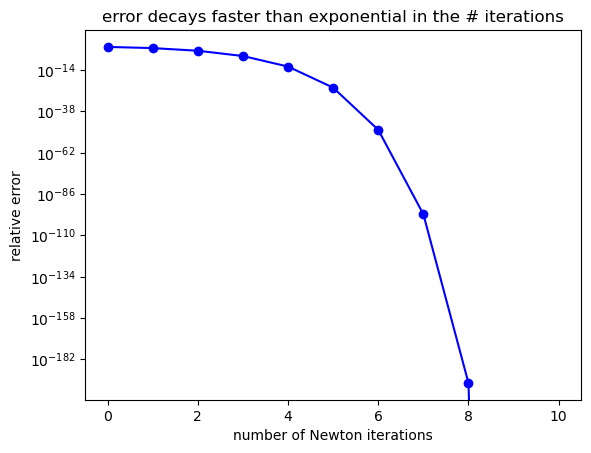

PyObject Text(0.5, 1.0, 'error decays faster than exponential in the # iterations')

In [19]:
# Of course, another way to see the convergence rate is to simply plot 
# the error. We will use the PyPlot package, which is a Julia interface 
# to the Python Matplotlib library. (Note: You will need to run 
# Pkg.add("PyPlot") to install PyPlot first.)

import Pkg; Pkg.add("PyPlot")
using PyPlot

setprecision(BigFloat, 4000)
vals = [iterate_sqrt(big(2), n, big(1)) for n in 0:10] # Newton iterates 
errs = abs.(vals .- sqrt(big(2))) ./ sqrt(big(2)) # relative errors
errs = Float64.(errs) # convert back to double-precision for plotting

semilogy(0:10, errs, "bo-")
ylabel("relative error")
xlabel("number of Newton iterations")
title("error decays faster than exponential in the # iterations")


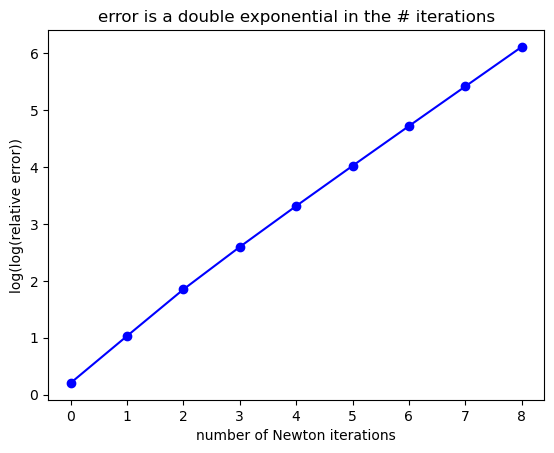

PyObject Text(0.5, 1.0, 'error is a double exponential in the # iterations')

In [20]:
# The convergence is faster than exponential! To see the rate properly, 
# we need to plot the log of the log of the error:

plot(0:10, log.(-log.(errs)), "bo-")
ylabel("log(log(relative error))")
xlabel("number of Newton iterations")
title("error is a double exponential in the # iterations")

In [22]:
# **Complex Square Roots**
# The Newton iterations also work when a is a complex number 
# and a complex square root is desired, with some caveats. For example,
# here we'll compute √-2 starting with x0=2+3i (written 2+3im in Julia):

for n = 0:10
    println(iterate_sqrt(-2, n, 2+3im))
end


2 + 3im
0.8461538461538461 + 1.7307692307692308im
0.19509764846552413 + 1.3317058589079314im
-0.010150464830919706 + 1.4009913351414562im
9.597830949879382e-5 + 1.4142384900461002im
1.6919405171266443e-9 + 1.4142135593360816im
-3.63343013171827e-18 + 1.414213562373095im
3.851859888774472e-34 + 1.414213562373095im
-4.276423536147513e-50 + 1.414213562373095im
4.7477838728798994e-66 + 1.414213562373095im
-5.271098971615262e-82 + 1.414213562373095im


In [23]:
# But if we start with x0=2, we'll find that it doesn't converge:
for n = 0:20
    println(iterate_sqrt(-2, n, 2))
end

2
0.5
-1.75
-0.3035714285714286
3.142331932773109
1.2529309672222557
-0.1716630854488237
5.739532701343778
2.6955361385562107
0.976784358209916
-0.5353752385394334
1.6001611866035577
0.1751435504763853
-5.6220304183911445
-2.6331435284005456
-0.9367975554591976
0.5990677140139902
-1.369726523091951
0.045209481546310326
-22.096649136881915
-11.003068837863651


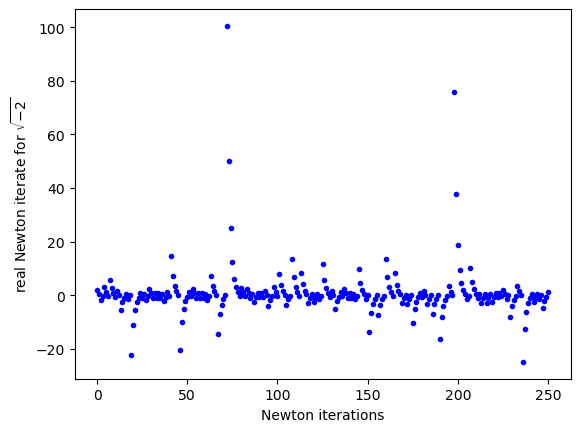

PyObject Text(29.902777777777786, 0.5, 'real Newton iterate for $\\sqrt{-2}$')

In [24]:
# If we plot these iterates, the pattern is quite interesting (some fractal pattern?):

plot(0:250, [iterate_sqrt(-2, n, 2) for n in 0:250], "b.")
xlabel("Newton iterations")
ylabel(L"real Newton iterate for $\sqrt{-2}$")


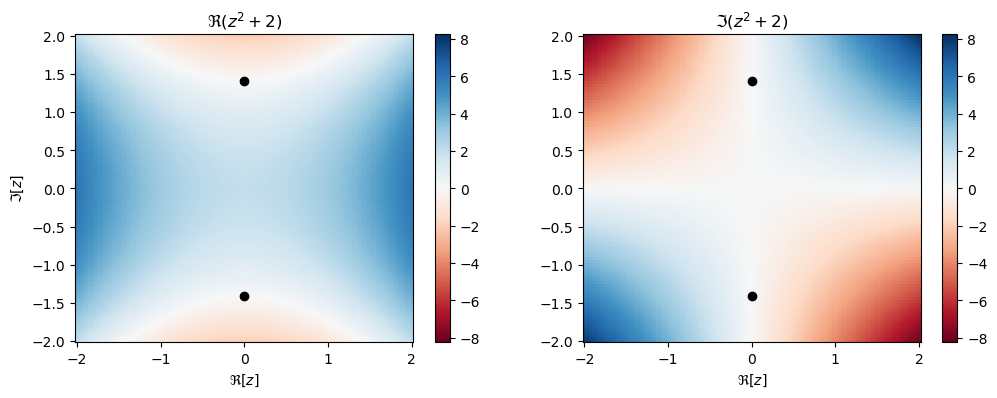

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc01c3c4790>

In [25]:
# The problem is that f(z)=z**2 + 2 has two roots: ±i*√2, and if we 
# start with a real guess then it can't decide which way to go in the 
# complex plane--the initial guess is sitting right on an extremum 
# with respect to ℑz. Let's plot f(z) in the complex plane, just for fun:

x = range(-2,2,length=100)
f = (x' .+ im * x).^2 .+ 2   # .+ is a "broadcasting" +, to combine the column vector x
                             # and the row vector x' into a matrix
s = maximum(abs, f) # for plot scaling

figure(figsize=(12,4))

subplot(1,2,1)
pcolor(Matrix(x'), x, real(f), cmap="RdBu", vmin=-s, vmax=s)
colorbar()
xlabel(L"\Re[z]")
ylabel(L"\Im[z]")
title(L"\Re(z^2+2)")
plot([0,0],[-sqrt(2),+sqrt(2)], "ko")

subplot(1,2,2)
pcolor(Matrix(x'), x, imag(f), cmap="RdBu", vmin=-s, vmax=s)
colorbar()
xlabel(L"\Re[z]")
title(L"\Im(z^2+2)")
plot([0,0],[-sqrt(2),+sqrt(2)], "ko")


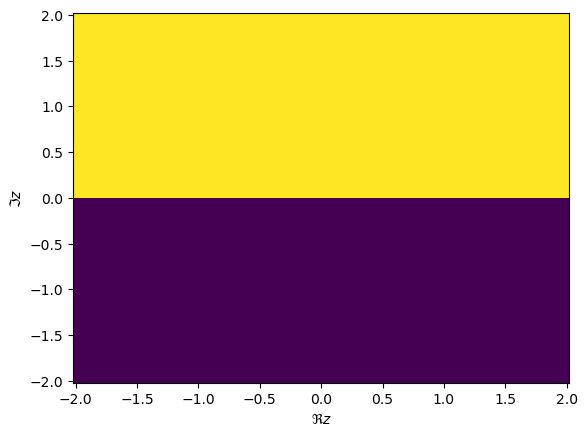

PyObject Text(24.156250000000007, 0.5, '$\\Im z$')

In [26]:
# Another interesting thing to plot are basins of attraction: 
# for each point z in the complex plane (excluding the real axis), 
# we plot whether Newton's method converges to ±i√2, as measured by the 
# distance after 25 Newton iterations. (Julia's speed is extremely helpful here.)

ξ = range(-2,2,length=100)
roots = ComplexF64[iterate_sqrt(-2, 25, x+im*y) for y in ξ, x in ξ]
pcolor(Matrix(ξ'), ξ, imag(roots))
xlabel(L"\Re z")
ylabel(L"\Im z")


In [27]:
# Unfortunately, the plot is rather boring: the upper-half complex plane 
# converges to +i√2 and the lower-half complex plane converges to −i√2

# Matters are more interesting if we apply Newton's method to the k-th 
# root of a, however: f(z)=z**k − a. The Newton iteration is then:
# x_(n+1)=x_n − (x_n^k − a)/ (k* x_n^(k−1)) = 1/k * [(k−1)x_n +a/ x_n^(k−1)]

function newtonroot(k, a, n, x, tol=1e-3)
    tol² = tol*tol
    for i = 1:n
        oldx = x
        x = ((k-1)*x + a/x^(k-1))/k
        # to speed things up, stop early if x changes by < tol
        if abs2(x - oldx) < tol²
            break
        end
    end
    return x
end




newtonroot (generic function with 2 methods)

In [28]:
# Now, we will plot the solutions of zk=1, i.e. the complex roots of unity,
# for which there are k solutions. Depending on the initial z, Newton 
# will converge to different roots, and we will visualize these "basins 
# of attraction" by plotting the phase angle arg(z), given by angle(z) in Julia.

function rootangle(k, z)
    θ = angle(newtonroot(k, 1, 25, z))/pi
    θ = θ < -0.95 ? 1.0 : θ # eliminate ±π oscillations from branch cut
    return θ
end
rootangles(k, X, Y) = Float64[rootangle(k, x+im*y) for y in Y, x in X]   

f = figure()
ξ = range(-2,2,length=600)
@manipulate for k in 2:10
    withfig(f) do
        imshow(rootangles(k, ξ, ξ), extent=(-2,2,-2,2)) # imshow is faster than pcolor
        xlabel(L"\Re z")
        ylabel(L"\Im z")
        title("Basins of attraction for $k-th roots of unity")
        colorbar(label="phase angle of root / π")
    end
end


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["k"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 10, :min => 2, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable(6), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/botan/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/botan/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/botan/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), Asset("css", nothing, "/home/botan/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), Asset("css", nothing, "/home/botan/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x00007fc035306270, Task (runnable) @0x00007fc035306270), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (2, 140463533614320, 140464587301200)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"8281207305946290122\",\"id\":\"34